In [1]:
import matplotlib.pyplot as plt

import numpy as np
import os
from ctd.comparison.analysis.tt.tt import Analysis_TT 
from ctd.comparison.analysis.dt.dt import Analysis_DT
# Import pca
import dotenv
from ctd.comparison.comparison import Comparison
import torch
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
dotenv.load_dotenv(dotenv.find_dotenv())
torch.manual_seed(42)
np.random.seed(42)

In [2]:


HOME_DIR = os.environ['HOME_DIR']
print(HOME_DIR)

pathTT_10 = HOME_DIR + 'content/trained_models/task-trained/20241107_NBFF_NoisyGRU_TrainingProcess_10/max_epochs=10_batch_size=1000_seed=0/'
pathTT_50 = HOME_DIR + 'content/trained_models/task-trained/20241107_NBFF_NoisyGRU_TrainingProcess_50/max_epochs=50_batch_size=1000_seed=0/'
pathTT_100 = HOME_DIR + 'content/trained_models/task-trained/20241107_NBFF_NoisyGRU_TrainingProcess_100/max_epochs=100_batch_size=1000_seed=0/'
pathTT_250 = HOME_DIR + 'content/trained_models/task-trained/20241107_NBFF_NoisyGRU_TrainingProcess_250/max_epochs=250_batch_size=1000_seed=0/'
pathTT_500 = HOME_DIR + 'content/trained_models/task-trained/20241017_NBFF_NoisyGRU_NewFinal/'
# pathTT = HOME_DIR + "content/trained_models/task-trained/tt_3bff/"
an_TT_10 = Analysis_TT(run_name = "TT", filepath = pathTT_10)
an_TT_50 = Analysis_TT(run_name = "TT", filepath = pathTT_50)
an_TT_100 = Analysis_TT(run_name = "TT", filepath = pathTT_100)
an_TT_250 = Analysis_TT(run_name = "TT", filepath = pathTT_250)
an_TT_500 = Analysis_TT(run_name = "TT", filepath = pathTT_500)

/home/csverst/Github/CtDBenchmark/


In [3]:
in_10 = an_TT_10.get_inputs(phase="val")
out_10 = an_TT_10.get_model_outputs(phase="val")
in_50 = an_TT_50.get_inputs(phase="val")
out_50 = an_TT_50.get_model_outputs(phase="val")
in_100 = an_TT_100.get_inputs(phase="val")
out_100 = an_TT_100.get_model_outputs(phase="val")
in_250 = an_TT_250.get_inputs(phase="val")
out_250 = an_TT_250.get_model_outputs(phase="val")
in_500 = an_TT_500.get_inputs(phase="val")
out_500 = an_TT_500.get_model_outputs(phase="val")




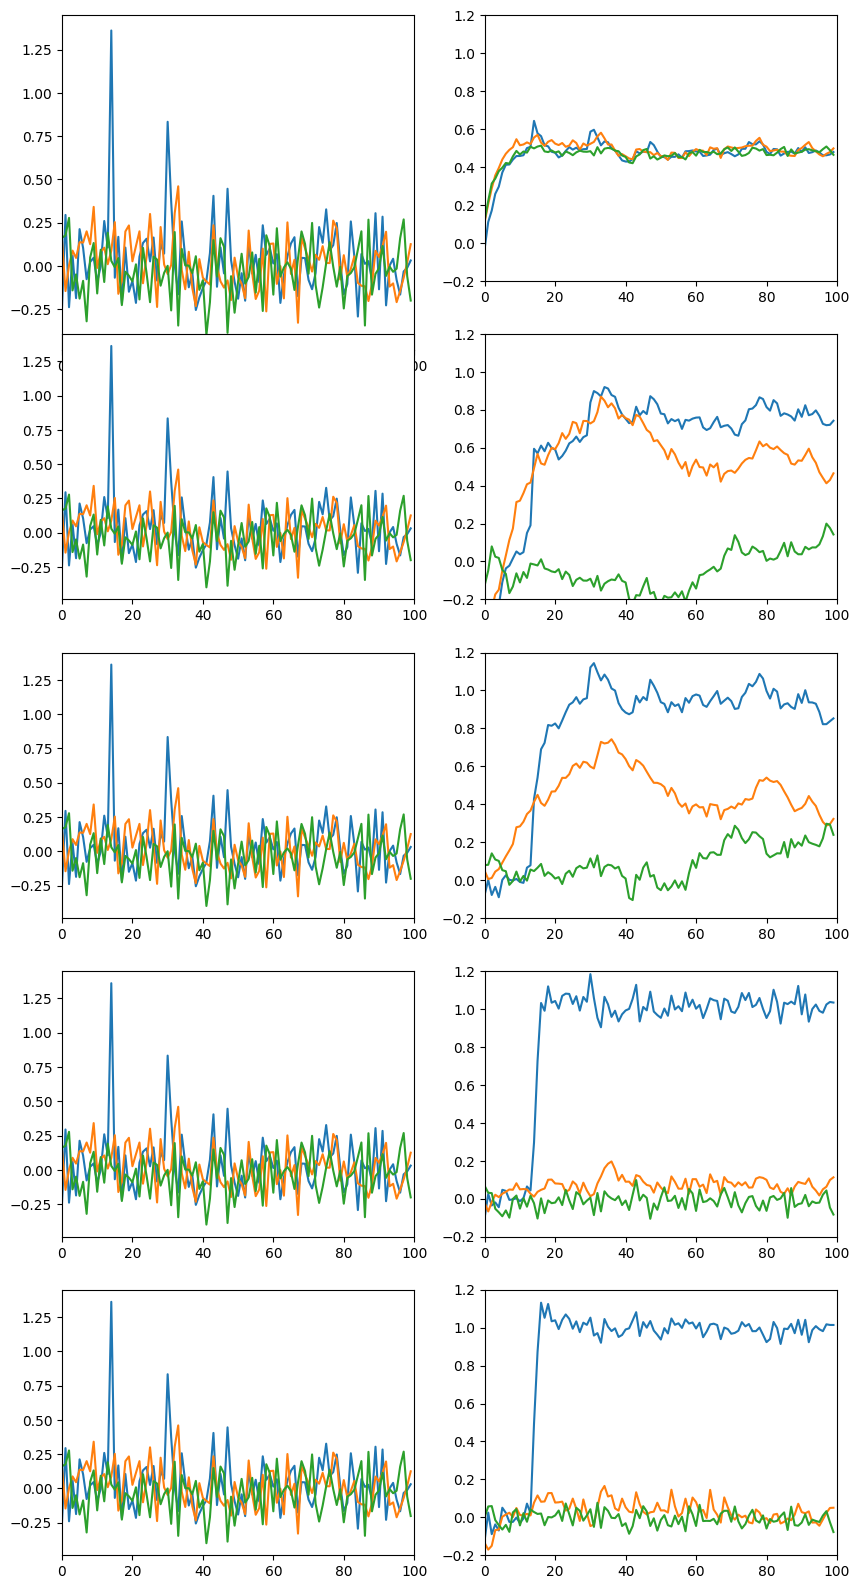

In [8]:
trial_ind= 6
fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot(421)
ax.plot(in_10[trial_ind, :100,:])
ax.set_xlim(0, 100)
ax2 = fig.add_subplot(522)
ax2.plot(out_10['controlled'][trial_ind, :100,:].detach().cpu().numpy())
ax2.set_xlim(0, 100)
ax2.set_ylim(-0.2, 1.2)

ax3 = fig.add_subplot(523)
ax3.plot(in_50[trial_ind,:100,:])
ax3.set_xlim(0, 100)
ax4 = fig.add_subplot(524)
ax4.plot(out_50['controlled'][trial_ind,:100,:].detach().cpu().numpy())
ax4.set_xlim(0, 100)
ax4.set_ylim(-0.2, 1.2)

ax5 = fig.add_subplot(525)
ax5.plot(in_100[trial_ind,:100,:])
ax5.set_xlim(0, 100)
ax6 = fig.add_subplot(526)
ax6.plot(out_100['controlled'][trial_ind,:100,:].detach().cpu().numpy())
ax6.set_xlim(0, 100)
ax6.set_ylim(-0.2, 1.2)

ax7 = fig.add_subplot(527)
ax7.plot(in_250[trial_ind,:100,:])
ax7.set_xlim(0, 100)
ax8 = fig.add_subplot(528)
ax8.plot(out_250['controlled'][trial_ind, :100,:].detach().cpu().numpy())
ax8.set_xlim(0, 100)
ax8.set_ylim(-0.2, 1.2)

ax9 = fig.add_subplot(529)
ax9.plot(in_500[trial_ind,:100,:])
ax9.set_xlim(0, 100)
ax10 = fig.add_subplot(5, 2, 10)
ax10.plot(out_500['controlled'][trial_ind, :100,:].detach().cpu().numpy())
ax10.set_xlim(0, 100)
ax10.set_ylim(-0.2, 1.2)


# Save a pdf
plt.savefig(f"TT_10_50_100_250_500_{trial_ind}.pdf")